In [104]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import telecontrol_parser as tp
import timeseries_functions as tf
import matplotlib.pyplot as plt
import modelling as mdl
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.linear_model import *
from sklearn.neural_network import *
from sklearn.ensemble import *
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn import tree
import sklearn
from sklearn.experimental import enable_hist_gradient_boosting
import tkinter
import plotly
import statsmodels.api as sma
from importlib import reload

root = tkinter.Tk()
my_dpi = root.winfo_fpixels('1i')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:
MLdb = mdl.MLdata('../data_sets/feats/')
MLdb.load_datasets()
MLdb.load_lobith_feats()
MLdb.set_dataset(2,features=('lobith_feats','gemaal_feats'))
# MLdb.set_dataset(2,features=tuple())



In [106]:
# MLdb.dataset.columns

In [107]:

    # MLdb.combine_datasets()
    # print(MLdb.datadict[list(MLdb.datadict.keys())[2]])
    # print(MLdb.datadict['ALL'])
    # print(MLdb.get_datasets())
    MLdb.clean_columns()
    MLdb.drop_na()
    MLdb.create_train_test_split(0.8)

    # MLdb.linear_regression()
    MLdb.scale_data()
    y_pred_naive = MLdb.naive_predictive()
    # MLdb.dataset


In [108]:
MLdb.get_VIF()


In [109]:
# MLdb.use_model(modelfunc = HistGradientBoostingRegressor)
# MLdb.use_model(modelfunc = OrthogonalMatchingPursuitCV)
MLdb.use_model(modelfunc = LinearRegression)
# MLdb.use_model(modelfunc = LassoCV, n_jobs = 5)




0.9145940570246832


In [110]:
model = MLdb.model


In [111]:
# X = MLdb.train_x
# y = MLdb.train_y.iloc[:,6*36-1]
# X2 = sma.add_constant(X)
# est = sma.OLS(y,X2)
# est2 = est.fit()
# print(est2.summary())


In [112]:
# coefs = pd.DataFrame(model.coef_,columns = MLdb.train_x.columns)
# coefs.columns[coefs.iloc[0,:]>0]



In [113]:
y_pred = model.predict(MLdb.test_x)
horizon = 6*6
scale = 0.75
plot = plt.figure(figsize=(scale*1920/my_dpi, scale*1080/my_dpi))
plt.plot(MLdb.test_y.iloc[:,horizon-1],label = 'true')
plt.plot(MLdb.test_y.index,y_pred[:,horizon-1], label = 'prediction')
plt.legend(fontsize = 'xx-large',loc = 'lower right')
plt.title('Model op t + '+str(horizon))
# plt.ylim(0,20)

plotly.tools.mpl_to_plotly(plot)

c:\Users\Admin\Anaconda3\envs\py36_env\lib\site-packages\plotly\matplotlylib\renderer.py:612: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



In [114]:
# print(MLdb.test_y)
# print(y_pred)
test_y = MLdb.test_y.iloc[:,0].values
pred_y = y_pred[:,0]

# print(mse(MLdb.test_y,y_pred)**(1/2))

In [115]:
# MLdb.test_x

In [116]:
# MLdb.test_x

In [117]:
# y_pred_naive

<Figure size 432x288 with 0 Axes>

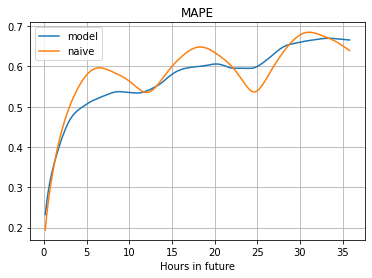

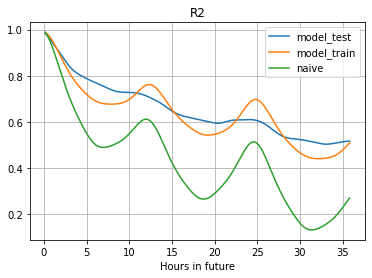

<Figure size 432x288 with 0 Axes>

In [118]:
mape_list = []
R2_list = []
R2_train_list = []
mape_list_naive = []
R2_list_naive = []

y_pred_train = model.predict(MLdb.train_x)



for i in range(0,MLdb.test_y.shape[1]-1):
    test_y = MLdb.test_y.iloc[:,i].values
    train_y = MLdb.train_y.iloc[:,i].values
    pred_y = y_pred[:,i]
    pred_y_train = y_pred_train[:,1]
    pred_y_naive = y_pred_naive.iloc[:,i]
    mape_list.append(mape(test_y,pred_y)**(1/2))
    R2_list.append(r2_score(test_y,pred_y))
    mape_list_naive.append(mape(test_y,pred_y_naive)**(1/2))
    R2_list_naive.append(r2_score(test_y,pred_y_naive))
    R2_train_list.append(r2_score(train_y,pred_y_train))

R2_list = np.array(R2_list).clip(min=0)


x_bereik = [(i*10+10)/60 for i in range(len(R2_list))]
plt.plot(x_bereik,mape_list,label = 'model')
plt.plot(x_bereik,mape_list_naive,label = 'naive')
plt.title('MAPE')
plt.xlabel('Hours in future')
plt.legend()
plt.grid()
plt.figure()
plt.plot(x_bereik,R2_list,label = 'model_test')
plt.plot(x_bereik,R2_train_list,label ='model_train')
plt.plot(x_bereik,R2_list_naive, label = 'naive')
plt.title('R2')
plt.xlabel('Hours in future')
plt.legend()
plt.grid()
plt.figure()


In [119]:
MLdb.get_dateranges().values()



dict_values([[Timestamp('2016-12-22 16:00:00'), Timestamp('2021-02-01 06:50:00')], [Timestamp('2021-02-01 06:50:00'), Timestamp('2022-02-10 20:10:00')]])

In [120]:
comp = MLdb.predict_window(past = 2,startdate = '2015-11-09 00:00:00')
comp


KeyError: Timestamp('2015-11-09 00:00:00')

In [ ]:
startdate = MLdb.get_random_date('test')
print(startdate)
comp = MLdb.predict_window(past = 2,startdate = startdate)
plot = comp.plot(figsize=(scale*1920/my_dpi, scale*1080/my_dpi),x_compat = True)
plotly.tools.mpl_to_plotly(plot.figure)

2016-11-17 10:10:00


c:\Users\Admin\Anaconda3\envs\py36_env\lib\site-packages\plotly\matplotlylib\renderer.py:612: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



In [ ]:
pd.to_datetime('2016-10-28 14:00:00')

Timestamp('2016-10-28 14:00:00')